# 5.1 - SENTIMENT ANALYSIS - *k-clique*

Per eseguire l'analisi dei tweet scritti dagli utenti nelle comunità identificate con l'algoritmo **k-clique** sul processo di Johnny Depp e Amber Heard verrà utilizzato il modello **VADER ( Valence Aware Dictionary for Sentiment Reasoning)**, sensibile sia alla polarità (positivo/negativo) che all'intensità dell'emozione.

In [9]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords 

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
nltk.download('stopwords')
sentiment = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# K-CLIQUES

1. carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 

**COMUNITÀ 0**

In [11]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df = pd.read_csv('../data_collection/data/df_kclique_coms_0.csv')
del df['Unnamed: 0']

In [27]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-12,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,elaine opening statement smeared making rambli...,[],0,2,9,drunk aunties lipstick psychotic toast weddin...,...,1,8,67,7.500000,elaine,0.0000,0.000,1.000,0.000,NEUTRALE
1,2022-04-12,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,elaine opening statement smeared making rambli...,[],0,2,9,drunk aunties lipstick psychotic toast weddin...,...,1,8,67,7.500000,elaine,0.0000,0.000,1.000,0.000,NEUTRALE
2,2022-04-12,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,elaine opening statement smeared making rambli...,[],0,2,9,drunk aunties lipstick psychotic toast weddin...,...,1,8,67,7.500000,elaine,0.0000,0.000,1.000,0.000,NEUTRALE
3,2022-04-13,16563753,joleonard___x,𝒥𝑜 . 🤜🏻🥊,issac baruch lady gentleman 😂 👏🏻 shout andysig...,"[{'screen_name': 'andysignore', 'name': 'andy ...",0,0,3,deppvsheard popcornedplanet,...,1,10,71,6.200000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
4,2022-04-14,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,cream 🤣🤣🤣 fix broken nose shark bite omg 🤣🤣🤣 c...,"[{'screen_name': 'petergilmoreart', 'name': 'p...",0,2,5,amicacream deppvheard deppvsheard,...,1,12,87,5.285714,NaN,-0.5574,0.313,0.556,0.131,NEGATIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11764,2022-06-11,15571195,vipvirtualsols,✨Alexandra✨,petition remove ambassador woman right g u n g 💩,[],1,5,9,amberheard aclu amberheardlsanabuser amberhea...,...,1,9,48,3.900000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
11765,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,breaking next role confirmed 💩🤡,[],0,0,7,amberheard aquaman aquamanandthelostkingdom a...,...,1,5,31,5.400000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
11766,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,yes admitted blackmail setup hoax still believ...,[],0,2,11,amberheardlsanabuser amberheardlsaliar amberh...,...,1,12,79,5.666667,NaN,0.2500,0.138,0.592,0.270,POSITIVO
11767,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,thickened plot 💩💩💩continues 🤔,[],0,1,2,amberheardlsanabuser amberheardlsaliar amberh...,...,1,4,29,6.500000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE


**COMUNITÀ 1**

In [12]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df1 = pd.read_csv('../data_collection/data/df_kclique_coms_1.csv')
del df1['Unnamed: 0']

In [28]:
df1

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-27,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,newsweek depp testimony damning sorry chose dr...,[],1,0,1,deppvsheard amberheardputupwithalot growupdepp,...,1,18,114,5.388889,NaN,-0.8126,0.420,0.580,0.000,NEUTRALE
1,2022-05-07,26282046,hlntv,HLN,hln legal analyst joeyjacksonesq say call test...,"[{'screen_name': 'joeyjacksonesq', 'name': 'jo...",5,3,18,amberheard deppvsheard,...,1,17,130,6.705882,NaN,0.1280,0.000,0.914,0.086,NEUTRALE
2,2022-05-08,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,sunstroke house msg amber speak appears violen...,[],1,0,1,deppvsheard amberheard johnnydeppisnosaint,...,1,11,70,5.454545,amber,-0.9136,0.594,0.406,0.000,NEUTRALE
3,2022-05-08,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,sunstroke house wanted fair trial testified ab...,[],1,0,7,deppvsheard,...,1,13,88,5.846154,NaN,-0.4404,0.240,0.629,0.131,NEUTRALE
4,2022-05-08,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,earthglows total silliness doubt violent flew ...,[],1,0,9,depp deppvsheard johnnydeppvsamberheard johnn...,...,1,11,72,5.636364,NaN,-0.6908,0.464,0.391,0.145,NEGATIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,2022-06-12,1497397049154801664,catwoman_1111,cat,laurabockov thank god televised lawcrimenetwor...,"[{'screen_name': 'lawcrimenetwork', 'name': 'l...",0,0,0,johnnydeppamberheardtrial,...,1,24,211,7.480000,NaN,0.3182,0.109,0.675,0.215,POSITIVO
3371,2022-06-12,1497397049154801664,catwoman_1111,cat,laurabockov thank god televised lawcrimenetwor...,"[{'screen_name': 'lawcrimenetwork', 'name': 'l...",0,0,0,johnnydeppamberheardtrial,...,1,24,211,7.480000,NaN,0.3182,0.109,0.675,0.215,NEGATIVO
3372,2022-06-07,768121325223227392,rossi4va,Gene Rossi,dear linda kenneybaden honored million others ...,"[{'screen_name': 'kenneybaden', 'name': 'linda...",1,1,6,deppheard polenta levityislife,...,1,12,96,7.083333,NaN,0.8689,0.000,0.426,0.574,NEGATIVO
3373,2022-06-07,768121325223227392,rossi4va,Gene Rossi,dear linda kenneybaden honored million others ...,"[{'screen_name': 'kenneybaden', 'name': 'linda...",1,1,6,deppheard polenta levityislife,...,1,12,96,7.083333,NaN,0.8689,0.000,0.426,0.574,POSITIVO


In [13]:
df2 = pd.read_csv('../data_collection/data/df_kclique_coms_2.csv')
del df2['Unnamed: 0']

In [29]:
df2

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-05-20,1138416104,farrisflagg,Farris Flagg,brijh justdoodirty momofpgh thesistahchick chr...,[],1,0,3,johnnydepp theview we thecrew johnnydeppamber...,...,1,22,192,7.772727,NaN,0.6705,0.0,0.784,0.216,NEUTRALE
1,2022-05-20,1348812771920650241,justdoodirty3,justdoodirty2,thesistahchick momofpgh farrisflagg brijh chri...,[],1,0,3,theview johnnydeppamberheardtrial,...,1,19,177,8.368421,NaN,0.4215,0.0,0.865,0.135,NEUTRALE
2,2022-05-20,1348812771920650241,justdoodirty3,justdoodirty2,following either … care,[],0,0,2,johnnydeppamberheardtrial theview,...,1,4,23,5.000000,NaN,0.4939,0.0,0.385,0.615,NEUTRALE


In [14]:
df3 = pd.read_csv('../data_collection/data/df_kclique_coms_3.csv')
del df3['Unnamed: 0']

In [30]:
df3

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-05-04,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,😂😂😂🤣🤣😂😂 supporter think dr hughes board cert m...,[],5,1,20,istandwithamberheard johnnydeppvsamberheard j...,...,1,11,71,5.545455,NaN,-0.3400,0.243,0.541,0.216,NEUTRALE
1,2022-05-04,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,dr hughes regurgitating someone else fact reme...,[],1,5,30,amberheard johnnydeppvsamberheard johnnydeppa...,...,1,8,57,6.250000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
2,2022-05-14,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,wrong pr guy working overtime 🙄🙄🙄🙄,[],0,1,3,amberheard johnnydeppamberheardtrial johnnyde...,...,1,6,34,4.833333,NaN,-0.4767,0.383,0.617,0.000,NEUTRALE
3,2022-05-13,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,lol picture posted uk paper ok courttv 🙄🙄🙄🙄,"[{'screen_name': 'courttv', 'name': 'court tv'...",0,1,2,johnnydeppamberheardtrial johnnydeppvamberhea...,...,1,8,43,4.500000,NaN,0.6124,0.000,0.545,0.455,NEUTRALE
4,2022-05-13,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,body language word v action,[],1,0,5,johnnydeppamberheardtrial johnnydeppvamberhea...,...,1,5,27,4.600000,NaN,0.0000,0.000,1.000,0.000,NEGATIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,2022-06-06,1469091555206123520,karate_kaninen,karatekaninen,people judy saying wasnt partying try shift fo...,[],1,0,0,deppvsheard deppheardtrial,...,1,15,96,5.466667,NaN,0.1571,0.121,0.723,0.156,NEGATIVO
892,2022-06-06,1469091555206123520,karate_kaninen,karatekaninen,people judy saying wasnt partying try shift fo...,[],1,0,0,deppvsheard deppheardtrial,...,1,15,96,5.466667,NaN,0.1571,0.121,0.723,0.156,POSITIVO
893,2022-06-06,1469091555206123520,karate_kaninen,karatekaninen,people judy saying wasnt partying try shift fo...,[],1,0,0,deppvsheard deppheardtrial,...,1,15,96,5.466667,NaN,0.1571,0.121,0.723,0.156,POSITIVO
894,2022-06-12,978434173819064320,barbaraem77,Bunny Babs,theemilydbaker chance court transcript recap s...,[],0,0,0,deppheardtrial,...,1,13,84,5.538462,NaN,0.2500,0.000,0.833,0.167,POSITIVO


Per ciascuna comunità:
1. verrà assegnato un punteggio (compound) con la funzione *sentiment.polarity_scores* del modello Vader
2. verranno impostate delle soglie per assegnare al tweet la classe NEUTRALE, POSITIVO E NEGATIVO in base al punteggio assegnato

In [15]:
df['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df['tweet'].astype(str)]
df['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df['tweet'].astype(str)]
df['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df['tweet'].astype(str)]
df['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df['tweet'].astype(str)]

In [16]:
df1['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df1['tweet'].astype(str)]
df1['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df1['tweet'].astype(str)]
df1['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df1['tweet'].astype(str)]
df1['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df1['tweet'].astype(str)]

In [17]:
df2['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df2['tweet'].astype(str)]
df2['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df2['tweet'].astype(str)]
df2['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df2['tweet'].astype(str)]
df2['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df2['tweet'].astype(str)]

In [18]:
df3['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df3['tweet'].astype(str)]
df3['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df3['tweet'].astype(str)]
df3['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df3['tweet'].astype(str)]
df3['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df3['tweet'].astype(str)]

In [19]:
#imposto le soglie
df['sentimenti']=''
df.loc[df.compound > 0,'sentimenti']='POSITIVO'
df.loc[df.compound == 0,'sentimenti']='NEUTRALE'
df.loc[df.compound < 0,'sentimenti']='NEGATIVO'

In [20]:
#imposto le soglie
df1['sentimenti']=''
df1.loc[df.compound > 0,'sentimenti']='POSITIVO'
df1.loc[df.compound == 0,'sentimenti']='NEUTRALE'
df1.loc[df.compound < 0,'sentimenti']='NEGATIVO'

In [21]:
#imposto le soglie
df2['sentimenti']=''
df2.loc[df.compound > 0,'sentimenti']='POSITIVO'
df2.loc[df.compound == 0,'sentimenti']='NEUTRALE'
df2.loc[df.compound < 0,'sentimenti']='NEGATIVO'

In [22]:
#imposto le soglie
df3['sentimenti']=''
df3.loc[df.compound > 0,'sentimenti']='POSITIVO'
df3.loc[df.compound == 0,'sentimenti']='NEUTRALE'
df3.loc[df.compound < 0,'sentimenti']='NEGATIVO'

----

### Risultati Sentiment Analysis
I risultati della sentiment analysis verranno rappresentati utilizzando:
- pie chart e barchart (percentuali di tweet positivi, neutrali e negativi
- wordcloud (parole dei tweet classificati come neutri, positivi e negativi)

#### Comunità 0

Percentuale dei tweet negativi, positivi e neutrali sotto forma di piechart e barchart

In [23]:
df["sentimenti"].value_counts()

NEGATIVO    4405
POSITIVO    4308
NEUTRALE    3056
Name: sentimenti, dtype: int64

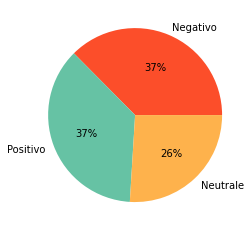

In [24]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df["sentimenti"].value_counts()
plt.pie(data, colors = colors, autopct='%.0f%%', labels = labels)
plt.savefig('plots/sentiment_analysis/kc0_pieplt.png')
plt.show()

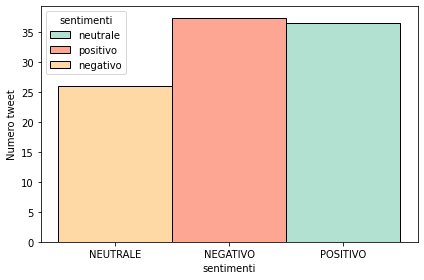

In [25]:
sns.set_palette("Set2")
colors = ['#feb24c', '#fc4e2a', "#66c2a4"]
sns.histplot(x="sentimenti", data=df, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.savefig('plots/sentiment_analysis/kc0_barplt.png')
plt.show()

Estrazione delle parole più frequenti nei tweet classificati come positivi, negativi e neutrali

In [43]:
tok_pos = ' '.join(df[df['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
#tok_pos

In [32]:
freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber      918
heard      451
johnny     449
depp       438
witness    313
courttv    275
good       266
trial      258
friend     249
team       229
dtype: int64

Rappresentazione delle parole più frequenti (eliminando quelle più diffuse come Amber Heard e Johnny Depp) in base ai 3 sentimenti

(-0.5, 999.5, 499.5, -0.5)

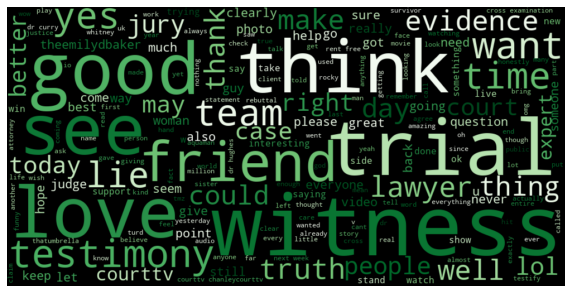

In [33]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])
tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/kc0_wc_pos.png')
plt.axis('off')

In [44]:
tok_neg= ' '.join(df[df['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()
#tok_neg

In [35]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber        1099
heard         621
johnny        449
depp          441
witness       334
make          259
time          258
testimony     258
see           245
jury          236
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

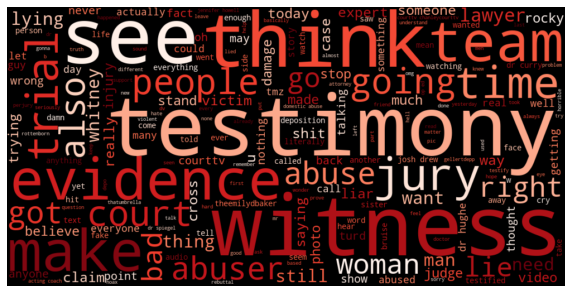

In [36]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])
tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/kc0_wc_neg.png')
plt.axis('off')

In [45]:
tok_neu = ' '.join(df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
#tok_neu

In [38]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber             455
heard             280
courttv           237
johnny            215
depp              208
chanleycourttv    172
witness           146
dr                144
trial             139
time              136
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

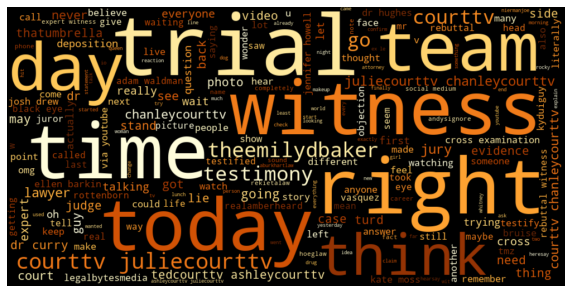

In [39]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])
tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/kc0_wc_neu.png')
plt.axis('off')

In [40]:
df1

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-27,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,newsweek depp testimony damning sorry chose dr...,[],1,0,1,deppvsheard amberheardputupwithalot growupdepp,...,1,18,114,5.388889,NaN,-0.8126,0.420,0.580,0.000,NEUTRALE
1,2022-05-07,26282046,hlntv,HLN,hln legal analyst joeyjacksonesq say call test...,"[{'screen_name': 'joeyjacksonesq', 'name': 'jo...",5,3,18,amberheard deppvsheard,...,1,17,130,6.705882,NaN,0.1280,0.000,0.914,0.086,NEUTRALE
2,2022-05-08,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,sunstroke house msg amber speak appears violen...,[],1,0,1,deppvsheard amberheard johnnydeppisnosaint,...,1,11,70,5.454545,amber,-0.9136,0.594,0.406,0.000,NEUTRALE
3,2022-05-08,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,sunstroke house wanted fair trial testified ab...,[],1,0,7,deppvsheard,...,1,13,88,5.846154,NaN,-0.4404,0.240,0.629,0.131,NEUTRALE
4,2022-05-08,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,earthglows total silliness doubt violent flew ...,[],1,0,9,depp deppvsheard johnnydeppvsamberheard johnn...,...,1,11,72,5.636364,NaN,-0.6908,0.464,0.391,0.145,NEGATIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,2022-06-12,1497397049154801664,catwoman_1111,cat,laurabockov thank god televised lawcrimenetwor...,"[{'screen_name': 'lawcrimenetwork', 'name': 'l...",0,0,0,johnnydeppamberheardtrial,...,1,24,211,7.480000,NaN,0.3182,0.109,0.675,0.215,POSITIVO
3371,2022-06-12,1497397049154801664,catwoman_1111,cat,laurabockov thank god televised lawcrimenetwor...,"[{'screen_name': 'lawcrimenetwork', 'name': 'l...",0,0,0,johnnydeppamberheardtrial,...,1,24,211,7.480000,NaN,0.3182,0.109,0.675,0.215,NEGATIVO
3372,2022-06-07,768121325223227392,rossi4va,Gene Rossi,dear linda kenneybaden honored million others ...,"[{'screen_name': 'kenneybaden', 'name': 'linda...",1,1,6,deppheard polenta levityislife,...,1,12,96,7.083333,NaN,0.8689,0.000,0.426,0.574,NEGATIVO
3373,2022-06-07,768121325223227392,rossi4va,Gene Rossi,dear linda kenneybaden honored million others ...,"[{'screen_name': 'kenneybaden', 'name': 'linda...",1,1,6,deppheard polenta levityislife,...,1,12,96,7.083333,NaN,0.8689,0.000,0.426,0.574,POSITIVO


Infine, salvo il df 

In [41]:
df.to_csv('../data_collection/data/df_sentiment_coms0_kclique.csv')

----

#### COMUNITÀ 1

Percentuale dei tweet negativi, positivi e neutrali sotto forma di piechart e barchart

In [46]:
df1["sentimenti"].value_counts()

POSITIVO    1275
NEGATIVO    1221
NEUTRALE     879
Name: sentimenti, dtype: int64

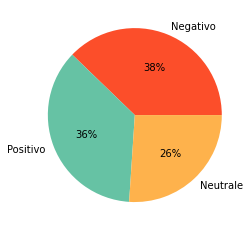

In [47]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df1["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')

plt.savefig("plots/sentiment_analysis/kc1_pieplt.png")
plt.show()

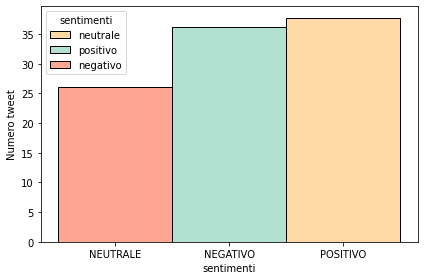

In [48]:
sns.set_palette("Set2")
colors = ['#fc4e2a', "#66c2a4", '#feb24c']
sns.histplot(x="sentimenti", data=df1, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.savefig('plots/sentiment_analysis/kc1_barplt.png')
plt.show()


Rappresentazione delle parole più frequenti (eliminando quelle più diffuse come Amber Heard e Johnny Depp) in base ai 3 sentimenti

In [79]:
tok_pos = ' '.join(df1[df1['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
#tok_pos

In [50]:

freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber        226
depp         151
heard        139
johnny       119
witness      101
evidence      91
case          77
make          75
testimony     73
see           68
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

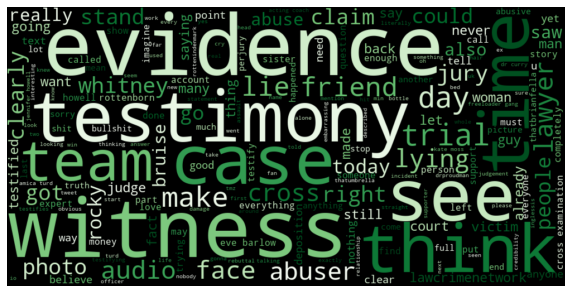

In [51]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df1
words = ' '.join([word for word in df1[df1['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/kc1_wordcloud_pos.jpg')
plt.axis('off')

In [80]:
tok_neg= ' '.join(df1[df1['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()
#tok_neg

In [53]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber        243
johnny       126
heard        124
witness      115
depp         114
😂             88
time          79
testimony     70
evidence      69
whitney       69
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

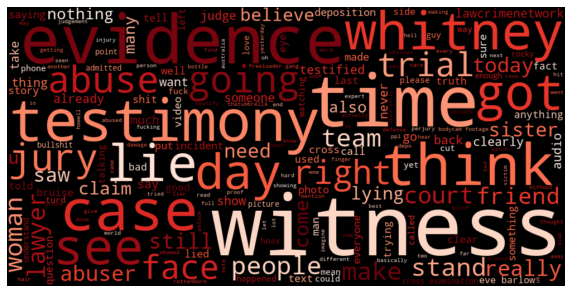

In [81]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine', '😂'])

tweet_df = df1
words = ' '.join([word for word in df1[df1['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds_r', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/kc1_wordcloud_negativo.png')
plt.axis('off')

In [82]:
tok_neu= ' '.join(df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
#tok_neu

In [56]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber             455
heard             280
courttv           237
johnny            215
depp              208
chanleycourttv    172
witness           146
dr                144
trial             139
time              136
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

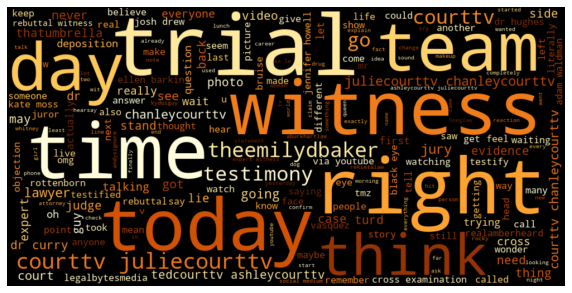

In [57]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/kc1_wc_neu.png')
plt.axis('off')

Infine, salvo il df 

In [58]:
df1.to_csv('../data_collection/data/df_sentiment_coms1_kclique.csv')

----

# COMUNITÀ 2

Percentuale dei tweet negativi, positivi e neutrali sotto forma di piechart e barchart

In [59]:
df2["sentimenti"].value_counts()

NEUTRALE    3
Name: sentimenti, dtype: int64

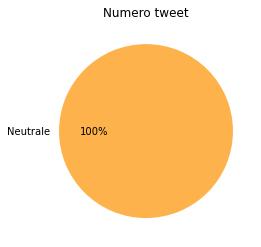

In [60]:
colors = ['#feb24c']
labels = ['Neutrale']
data = df2["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')
plt.savefig('plots/sentiment_analysis/kc2_pieplt.png')
plt.title("Numero tweet")
plt.show()

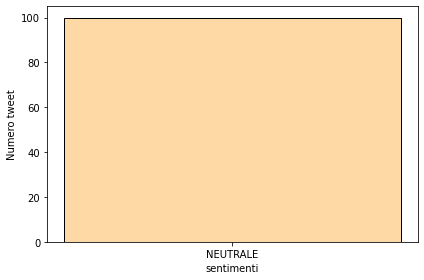

In [61]:

colors = ['#feb24c']
#labels = ['negativo', 'positivo', 'neutrale']
sns.histplot(x="sentimenti", data=df2, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.savefig('plots/sentiment_analysis/kc2_barplt.png')
plt.show()

In [83]:
tok_neu= ' '.join(df2[df2['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
#tok_neu

In [63]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

brijh             2
momofpgh          2
thesistahchick    2
chrissysblog      2
luvwinsresist     2
glamorkt          2
rettypetty        2
liveonthechat     2
jimmiemckinnon    2
clady             2
dtype: int64

Rappresentazione delle parole più frequenti (eliminando quelle più diffuse come Amber Heard e Johnny Depp) in base ai 3 sentimenti

(-0.5, 999.5, 499.5, -0.5)

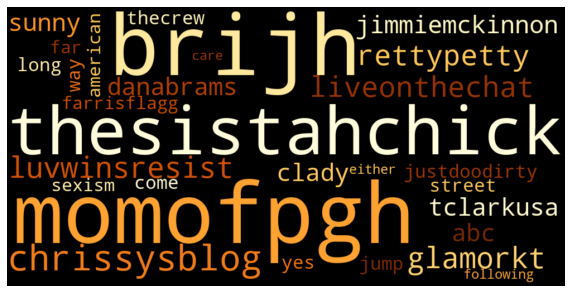

In [64]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df2
words = ' '.join([word for word in df2[df2['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/kc2_wc_neu.png')
plt.axis('off')

Infine, salvo il df 

In [65]:
df2.to_csv('../data_collection/data/df_sentiment_coms2_kclique.csv')

----

# COMUNITÀ 3

In [66]:
df3["sentimenti"].value_counts()

NEGATIVO    331
POSITIVO    298
NEUTRALE    267
Name: sentimenti, dtype: int64

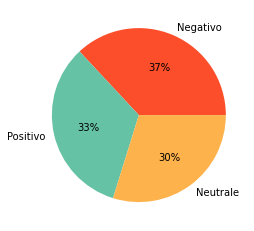

In [67]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df3["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')
plt.savefig('plots/sentiment_analysis/kc3_pieplt.png')
plt.show()

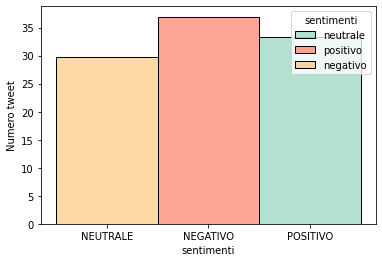

In [68]:

colors = ['#feb24c', '#fc4e2a', "#66c2a4"]
sns.histplot(x="sentimenti", data=df3, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.savefig('plots/sentiment_analysis/kc3_barplt.png')
plt.show()

In [84]:
tok_pos = ' '.join(df3[df3['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
#tok_pos

In [70]:

freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

theemilydbaker     120
legalbytesmedia     95
heard               50
amber               48
trial               37
people              34
lawyer              28
make                26
johnny              25
depp                24
dtype: int64

Rappresentazione delle parole più frequenti (eliminando quelle più diffuse come Amber Heard e Johnny Depp) in base ai 3 sentimenti

(-0.5, 999.5, 499.5, -0.5)

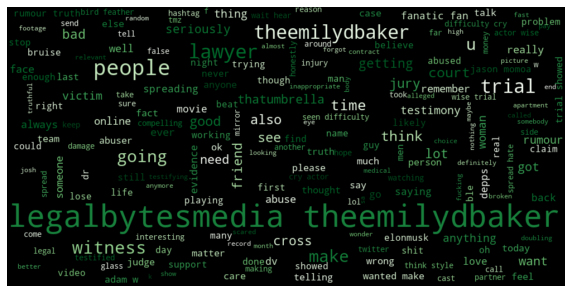

In [71]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])
tweet_df = df3
words = ' '.join([word for word in df3[df3['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/kc3_wc_pos.png')
plt.axis('off')

In [85]:
tok_neg= ' '.join(df3[df3['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()
#tok_neg

In [73]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

theemilydbaker     134
legalbytesmedia     97
johnny              43
depp                43
heard               41
people              39
amber               39
trial               35
court               29
lawyer              24
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

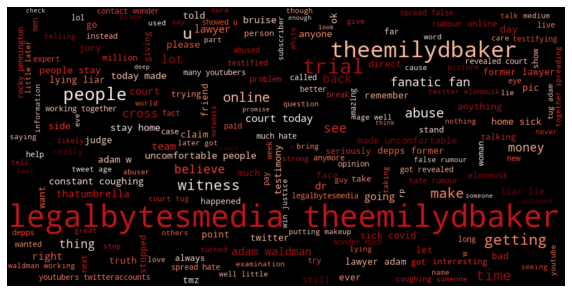

In [74]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df3
words = ' '.join([word for word in df3[df3['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/kc3_wc_neg.png')
plt.axis('off')

In [86]:

tok_neu= ' '.join(df3[df3['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
#tok_neu

In [76]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

theemilydbaker     104
legalbytesmedia     76
heard               44
amber               40
johnny              31
lawyer              30
depp                30
people              27
trial               27
think               20
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

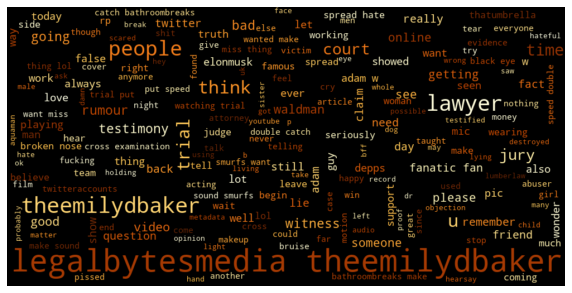

In [77]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df3
words = ' '.join([word for word in df3[df3['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/kc3_wc_neu.png')
plt.axis('off')

Infine, salvo il df

In [78]:
df3.to_csv('../data_collection/data/df_sentiment_coms3_kclique.csv')